In [46]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [47]:
import librosa as libro
from librosa import display
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [48]:
# file_path = "/home/manoj/HBRS/R&D/Data/URBAN-SED_v2.0.0/audio/test/soundscape_test_bimodal0.wav"
file_path = "/home/manoj/HBRS/R&D/Data/UrbanSound8K/audio/fold1/24074-1-0-0.wav"

In [49]:
# file_path = "/media/manoj/Manoj_drive/R&D/Data/ESC/ESC-50-master/audio/1-137-A-32.wav"
audio_sample, audio_sample_rate = libro.load(file_path, sr = None, mono = True,offset = 0.0, duration = None)
len(audio_sample), audio_sample_rate
print(audio_sample)

[ 0.01896667  0.01776123  0.01609802 ... -0.07261658 -0.07246399
 -0.07365417]


In [50]:
# sampling rate is 44.1k means audio was recorded at 44.1kHz 
# while recording this file we were capturing 44.1k amplitudes every second
duration_of_sound = len(audio_sample)/audio_sample_rate
print("Duration of audio {}sec".format(duration_of_sound))

Duration of audio 4.0sec


In [51]:
Audio(file_path)

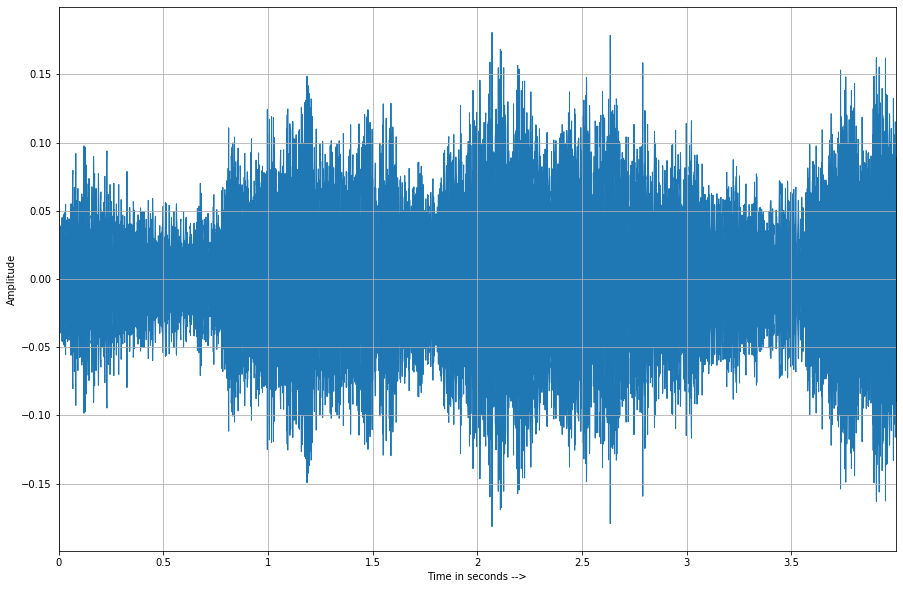

In [52]:
# Time domain representation
# This shows us loudness associated with sound
# 
plt.figure(figsize=(15,10))
libro.display.waveplot(y = audio_sample, sr = audio_sample_rate)
plt.xlabel("Time in seconds -->")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [53]:
# Fourier trasnform is used to convert time domain to frequency domain
# 
def time_domain(samples,f,magnitude):
    x = np.arange(samples)
    y1 = magnitude*np.sin(2*np.pi*f*(x/samples))
    plt.figure(figsize=(15,10))
    plt.stem(x,y1, 'g')
    plt.plot(x,y1)
    plt.xlabel("Time -->")
    plt.ylabel("Amplitude")
    return y1

/home/manoj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


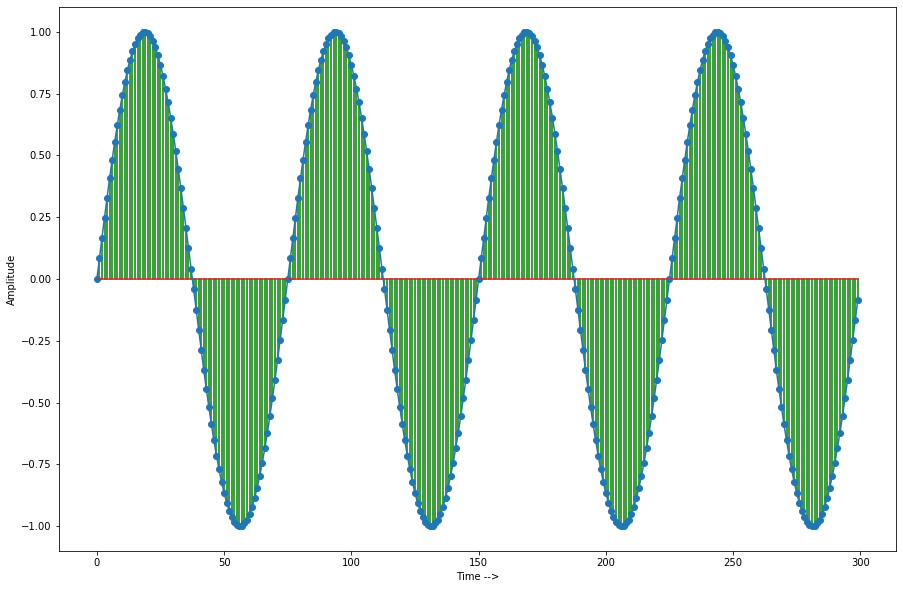

In [54]:
y1 = time_domain(300,4,1)

In [55]:
def fft_plot(audio, sample_rate):
    n = len(audio)
    T =  1/sample_rate
    yf = sp.fft(audio)
    xf = np.linspace(0.0, 1.0/(2.0*T), n/2)
#     fig, ax = plt.subplots()
#     ax.plot(xf, 2.0/n*np.abs(yf[:n//2]), figsize=(15,10))
    plt.figure(figsize=(15,10))
    plt.plot(xf,2.0/n*np.abs(yf[:n//2]))
    plt.grid()
#     plt.xticks(x)
    plt.xlabel("Frequency-->")
    plt.ylabel("magnitude")
    return plt.show()

/home/manoj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  after removing the cwd from sys.path.


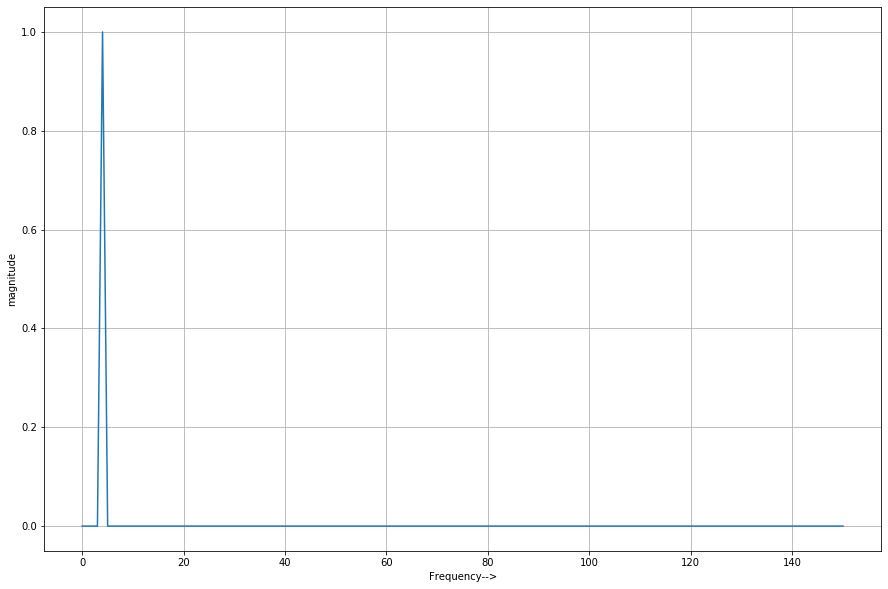

In [56]:
fft_plot(y1,300)

/home/manoj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


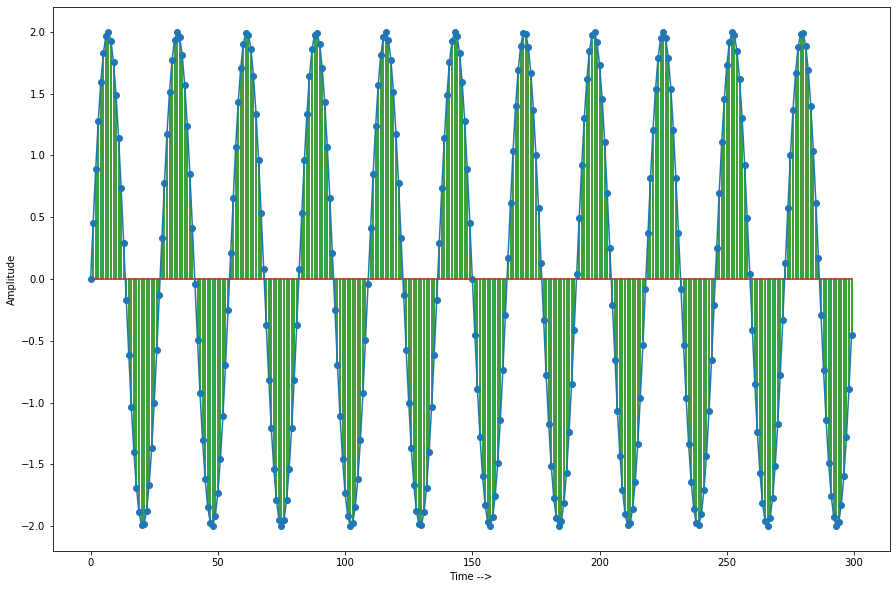

In [57]:
# LEts create not a pure sine wave then plot the frequency
y2 = time_domain(300,11,2)

/home/manoj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  after removing the cwd from sys.path.


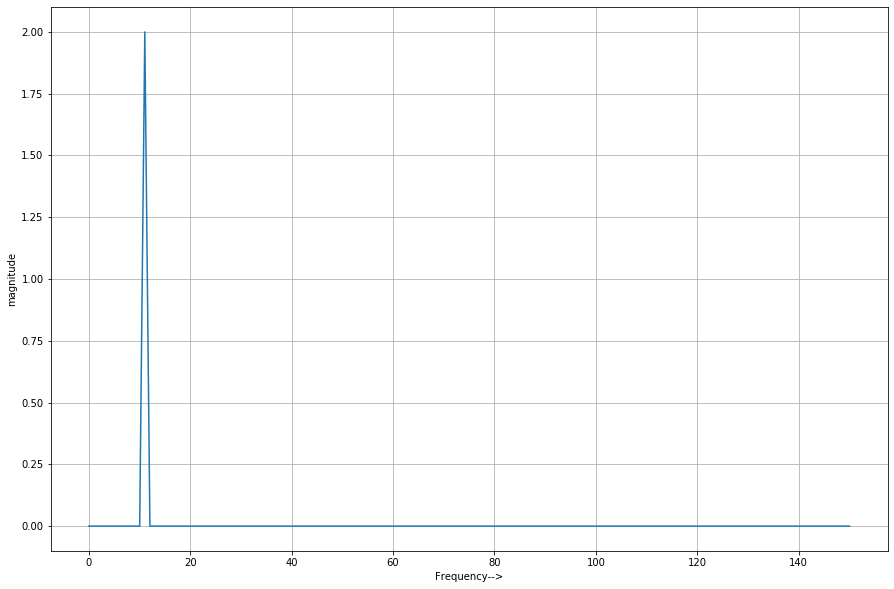

In [58]:
fft_plot(y2,300)

Text(0, 0.5, 'Amplitude')

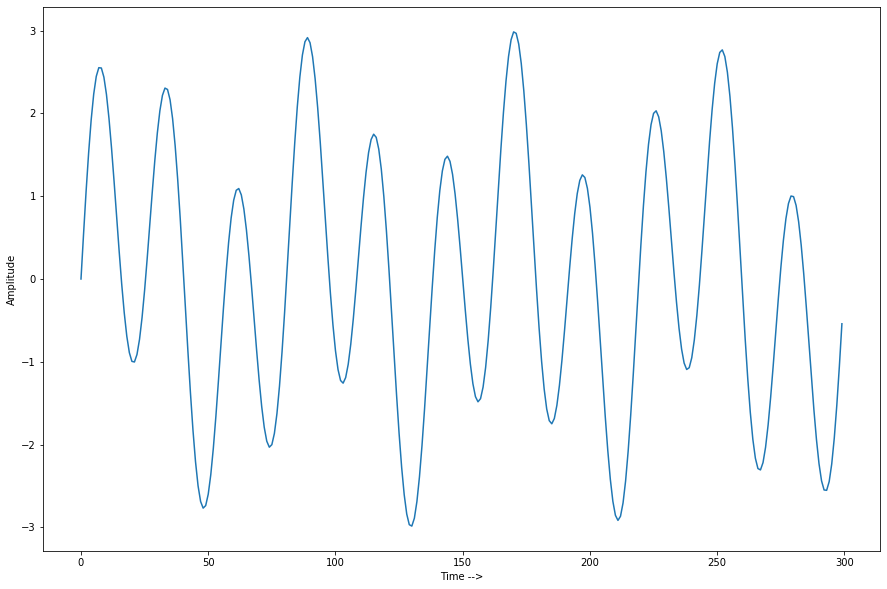

In [59]:
# we will add two signal of same sampling rate 300 but of different amplitude(1 and 2) and frequency(11 and 4)
y3 = y1+y2
x = np.arange(300)
plt.figure(figsize=(15,10))
plt.plot(x,y3)
plt.xlabel("Time -->")
plt.ylabel("Amplitude")

/home/manoj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  after removing the cwd from sys.path.


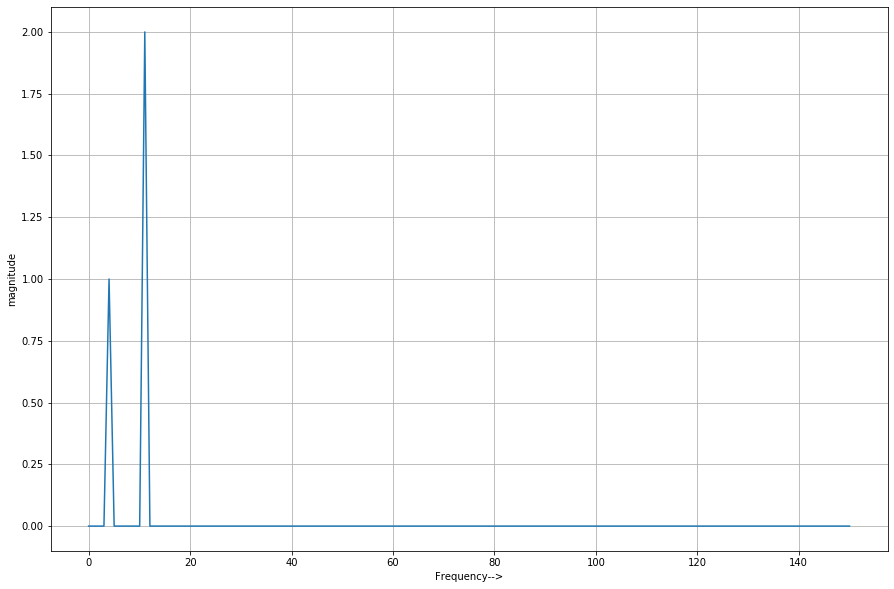

In [60]:
fft_plot(y3,300)
# We can see two frequencies 1hz and 2hz. Mix of two frequencies

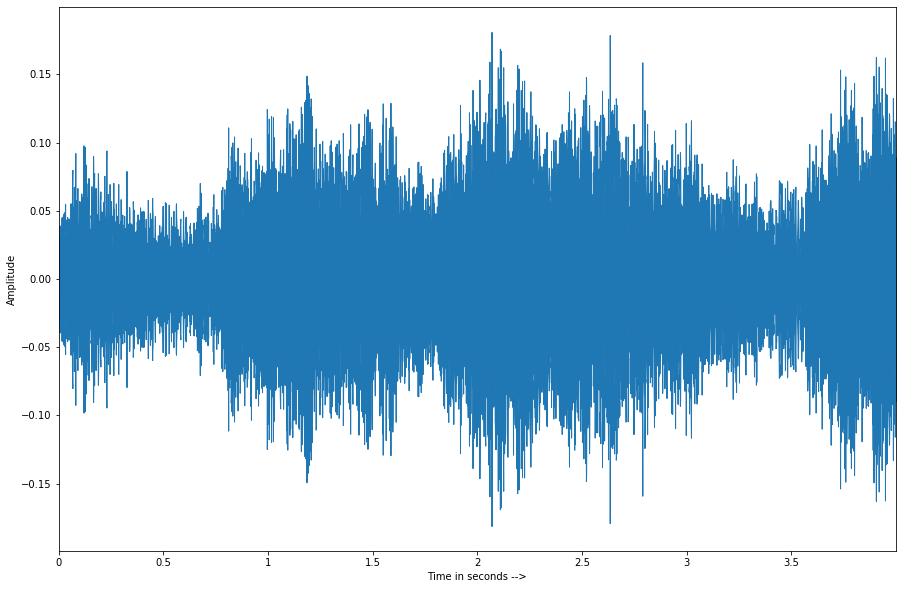

In [61]:
plt.figure(figsize=(15,10))
libro.display.waveplot(y = audio_sample, sr = audio_sample_rate)
plt.xlabel("Time in seconds -->")
plt.ylabel("Amplitude")
plt.show()

/home/manoj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  after removing the cwd from sys.path.


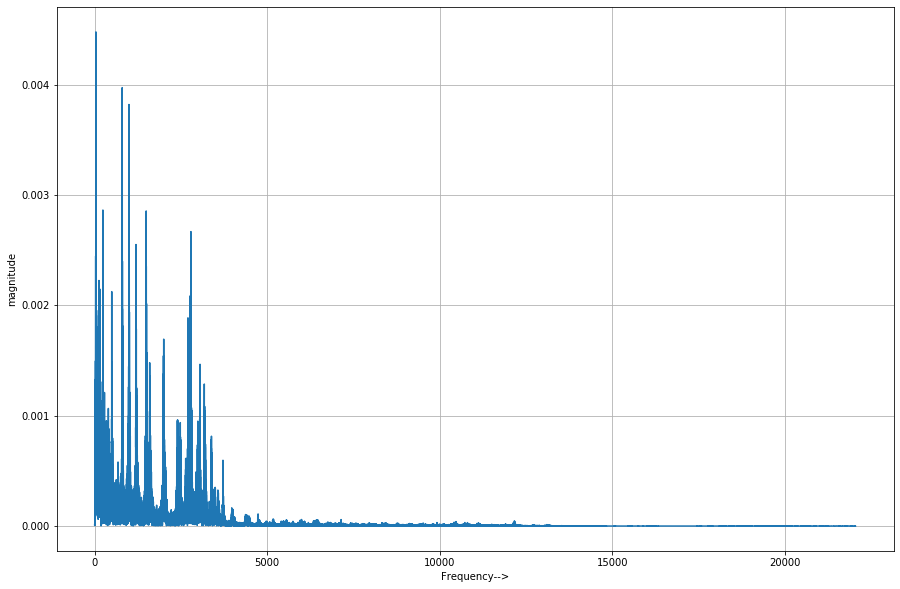

In [62]:
fft_plot(audio_sample,audio_sample_rate)

In [63]:
def spectrogram(samples, sample_rate, stride_ms = 10.0, 
                          window_ms = 20.0, max_freq = None, eps = 1e-14):

    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)

    # Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples, 
                                          shape = nshape, strides = nstrides)
    
    assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

    # Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]
    
    fft = np.fft.rfft(windows * weighting, axis=0)
    fft = np.absolute(fft)
    fft = fft**2
    
    scale = np.sum(weighting**2) * sample_rate
    fft[1:-1, :] *= (2.0 / scale)
    fft[(0, -1), :] /= scale
    
    # Prepare fft frequency list
    freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])
    
    # Compute spectrogram feature
    ind = np.where(freqs <= max_freq)[0][-1] + 1
    specgram = np.log(fft[:ind, :] + eps)
    return specgram

# spectrogram(audio_sample,audio_sample_rate)

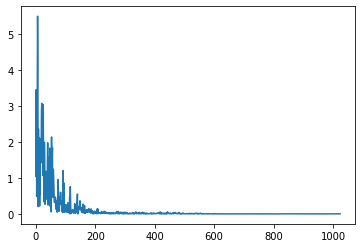

In [64]:
whale_song, _ = libro.effects.trim(audio_sample)
n_fft = 2048
D = np.abs(libro.stft(whale_song[:n_fft], n_fft=n_fft,
                        hop_length=n_fft+1))
plt.plot(D)

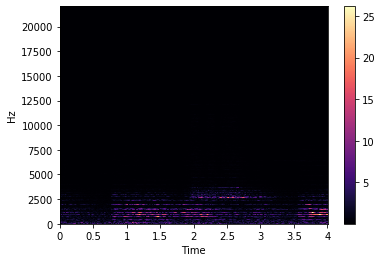

In [65]:
hop_length = 512
D = np.abs(libro.stft(whale_song, n_fft=n_fft,  
                        hop_length=hop_length))
libro.display.specshow(D, sr=audio_sample_rate, x_axis='time', y_axis='linear')
plt.colorbar()

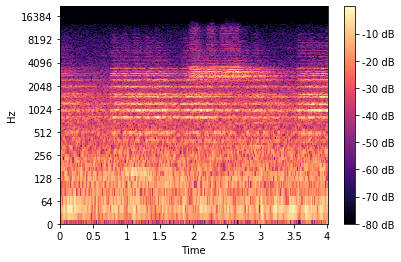

In [66]:
DB = libro.amplitude_to_db(D, ref=np.max)
libro.display.specshow(DB, sr=audio_sample_rate, hop_length=hop_length, 
                         x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');